<a href="https://colab.research.google.com/github/Ananassio/Data-Science_lab/blob/main/week_7/Assignment_CNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment - Image Classification with CNNs
![CIFAR10](https://miro.medium.com/max/964/1*syyml8q8s1Yt-iEea5m1Ag.png)

[CIFAR 10](https://www.cs.toronto.edu/~kriz/cifar.html) is a small toy data set for image classifaction. 

* It has 60k images from ten diffenrent classes (like car, airplane, horse,..)
* The RGB images are of size 32x32 pixels  

In [35]:
#import needed libs
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
import os
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental.preprocessing import CenterCrop
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
import numpy as np

#some vars to controll the training -> use them in your code
batch_size = 32
num_classes = 10 #fixed!
epochs = 10

# Get the data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Task:
* visualize some sample images from different classes
* build and train the ***AlexNet*** CNN architecture from the lecture, use the following Keras layers:
    * overview: https://keras.io/api/layers/
    * 2d convolution: https://keras.io/api/layers/convolution_layers/convolution2d/
    * Fully Connected (=Matrix Multiplication MLP): https://keras.io/api/layers/core_layers/dense/
    * Pooling: https://keras.io/api/layers/pooling_layers/max_pooling2d/   
* use 'relu' functions for the non-linear activation -> https://keras.io/api/layers/activation_layers/relu/
* optimize the learning hyper-paramters to get the best  test accuracy

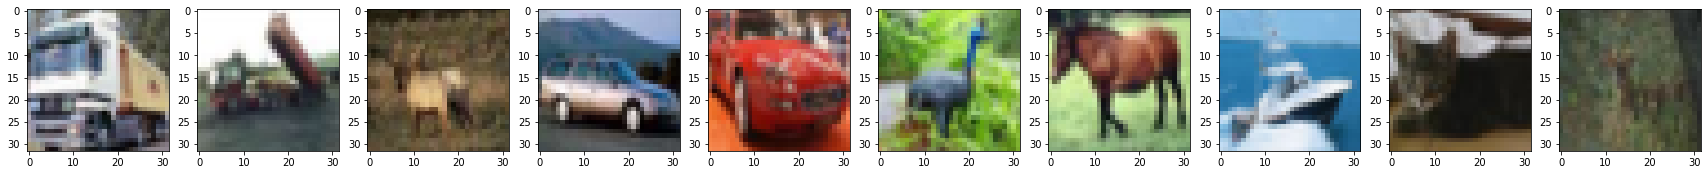

In [19]:
fig, axes = plt.subplots(figsize=(30,15),nrows=1, ncols=10)

x=1;
for ax in axes:
    ax.imshow(x_train[x])
    x=x+1;


In [24]:
# we expect our inputs to be RGB images of the size 32x32
inputs = keras.Input(shape=(32, 32, 3))

In [51]:
# Center-crop images to 150x150
l1 = CenterCrop(height=150, width=150)(inputs)
# Rescale images to [0, 1]
l2 = Rescaling(scale=1.0 / 255)(l1)

# Apply some convolution and pooling layers
l3 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l2)
l4 = layers.MaxPooling2D(pool_size=(3, 3))(l3)
l5 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l4)
l6 = layers.MaxPooling2D(pool_size=(3, 3))(l5)
l7 = layers.Conv2D(filters=32, kernel_size=(3, 3), activation="relu")(l6)

# Apply global average pooling to get flat feature vectors
l8 = layers.GlobalAveragePooling2D()(l7)

# Add a dense classifier on top
outputs = layers.Dense(num_classes, activation="softmax")(l8)

In [52]:
# Apply global average pooling to get flat feature vectors
l3 = layers.GlobalAveragePooling2D()(l2)

# Add a dense classifier on top

outputs = layers.Dense(num_classes, activation="softmax")(l3)

In [53]:
model = keras.Model(inputs=inputs, outputs=outputs)

In [60]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=[keras.metrics.CategoricalAccuracy(name="acc")])

In [61]:
import tensorflow as tf
val_dataset = tf.data.Dataset.from_tensor_slices((x_test,y_test)).batch(batch_size)

In [62]:
history = model.fit(x_train, y_train, epochs=epochs, validation_data=val_dataset)

Epoch 1/10
1563/1563 [==============================] - 17s 11ms/step - loss: 2.2929 - acc: 0.1067 - val_loss: 2.2798 - val_acc: 0.1246
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.2716 - acc: 0.1461 - val_loss: 2.2615 - val_acc: 0.1615
Epoch 3/10
1563/1563 [==============================] - 13s 8ms/step - loss: 2.2554 - acc: 0.1670 - val_loss: 2.2458 - val_acc: 0.1901
Epoch 4/10
1563/1563 [==============================] - 13s 9ms/step - loss: 2.2416 - acc: 0.1805 - val_loss: 2.2324 - val_acc: 0.1890
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 2.2298 - acc: 0.1852 - val_loss: 2.2205 - val_acc: 0.1869
Epoch 6/10
1563/1563 [==============================] - 13s 9ms/step - loss: 2.2194 - acc: 0.1878 - val_loss: 2.2105 - val_acc: 0.2025
Epoch 7/10
1563/1563 [==============================] - 15s 10ms/step - loss: 2.2103 - acc: 0.1935 - val_loss: 2.2015 - val_acc: 0.1914
Epoch 8/10
1563/1563 [==============================]